In [19]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def parse(X):
    return datetime.datetime.strptime(X, '%Y-%m-%d')

In [21]:
AMZN = pd.read_csv('AMZN.csv', parse_dates = [0], date_parser = parse)
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [22]:
def technical_indicators(dataset):
    dataset['MA7'] = dataset['Close'].rolling(window = 7).mean()
    dataset['MA21'] = dataset['Close'].rolling(window = 21).mean()
    dataset['26EWMA'] = dataset['Close'].ewm(span = 26).mean()
    dataset['12EWMA'] = dataset['Close'].ewm(span = 12).mean()
    dataset['MACD'] = dataset['12EWMA'] - dataset['26EWMA']
    dataset['20STD'] = dataset['Close'].rolling(20).std()
    dataset['Upper Band'] = dataset['MA21'] + (2 * dataset['20STD'])
    dataset['Lower Band'] = dataset['MA21'] - (2 * dataset['20STD'])
    dataset['EWMA'] = dataset['Close'].ewm(com = 0.5).mean()
    dataset['Momentum'] = dataset['Close'] - 1
    dataset['Logarithmic Momentum'] = np.log(dataset['Momentum'])
    return dataset

In [23]:
technical_indicators(AMZN)
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA7,MA21,26EWMA,12EWMA,MACD,20STD,Upper Band,Lower Band,EWMA,Momentum,Logarithmic Momentum
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN,1.958333,1.958333,0.000000,NaN,NaN,NaN,1.958333,0.958333,-0.042560
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,NaN,NaN,1.839343,1.834201,-0.005142,NaN,NaN,NaN,1.786458,0.729167,-0.315852
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,NaN,NaN,1.792272,1.785075,-0.007197,NaN,NaN,NaN,1.732372,0.708333,-0.344841
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,NaN,NaN,1.748422,1.737834,-0.010589,NaN,NaN,NaN,1.666927,0.635417,-0.453474
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,NaN,NaN,1.673903,1.653404,-0.020499,NaN,NaN,NaN,1.506370,0.427083,-0.850777


In [24]:
def plot_technical_indicators(dataset, days = 0):
    plt.figure(figsize = (18, 9))
    shape = dataset.shape[0]
    xMACD = shape - days
    dataset = dataset.iloc[-days:, :]
    x = range(3, shape)
    x = list(dataset.index)
    plt.subplot(2, 1, 1)
    plt.plot(dataset['MA7'], label = 'MA7', color = 'g', linestyle = '--')
    plt.plot(dataset['Close'], label = 'Closing Price', color = 'b')
    plt.plot(dataset['MA21'], label = 'MA21', color = 'r', linestyle = '--')
    plt.plot(dataset['Upper Band'], label = 'Upper BB', color = 'c')
    plt.plot(dataset['Lower Band'], label = 'Lower BB', color = 'c')
    plt.fill_between(x, dataset['Lower Band'], dataset['Upper Band'], alpha = 0.4)
    plt.title('Technical Indicators for Apple: Previous {} Days'.format(shape))
    plt.ylabel('Price')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'], label = 'MACD', linestyle = '-.')
    plt.hlines(15, xMACD, shape, colors = 'g', linestyles = '--')
    plt.hlines(-15, xMACD, shape, colors = 'g', linestyles = '--')
    plt.plot(dataset['Logarithmic Momentum'], label = 'Momentum', color = 'b', linestyle = '-')
    plt.legend()

KeyError: 'MA7'

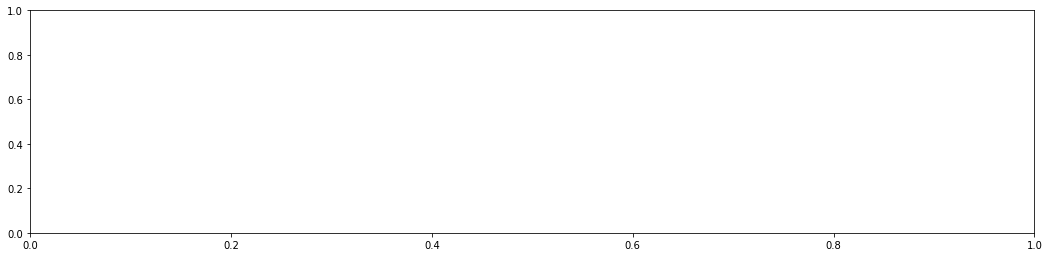

In [14]:
plot_technical_indicators(AMZN)